# draw the relation between article age, in-topic citation and node knowledge temperature 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## read data

In [2]:
folder_name = '372720438 word rep in vector space\\'
pioneer_id = 372720438
df = pd.read_csv(folder_name + str(pioneer_id) + "node_2020.csv")
paper_yr = pd.read_csv(folder_name + str(pioneer_id) + "domain_paper.csv")
df_ref =  pd.read_csv(folder_name + str(pioneer_id) + "domain_reference.csv")

## age-$T^t$

In [3]:
df['year'] = df.apply(lambda x: paper_yr[paper_yr['paper_id'] == x[0]].iloc[0].at['year'], axis = 1)
df['age'] = df.apply(lambda x: int(2020-x['year']),axis = 1) 
avg_T = df['T'].mean()
age_T = df.groupby(['age'])['T'].mean()

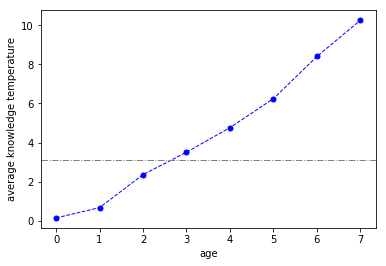

In [4]:
# visualize average node knowledge temperature for every article age
age_T.plot(marker = '.', markersize = 10,color = 'blue',ls = '--',lw = 1)
plt.xlabel('age')
plt.ylabel('average knowledge temperature') 
plt.axhline(avg_T, color = 'grey', ls = '-.',lw = 1)

## citation-$T^t$

In [5]:
tmp = df_ref.groupby('reference_id').count()['paper_id']
df_citation_stats = pd.DataFrame({'id': df['id'], 'T':df['T']})
df_citation_stats['citation_count'] = df_citation_stats.apply(lambda x: tmp[x[0]] if x[0] in tmp.index else 0,axis = 1)
citation_T = df_citation_stats.groupby(['citation_count'])['T'].mean()

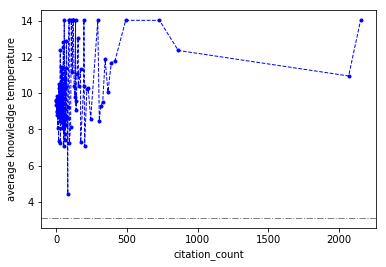

In [6]:
# visualize average node knowledge temperature for every in-topic citation
citation_T[1:-1].plot(marker = '.', color = 'blue',ls= '--',lw = 1)  # cut 0 citation paper and the pioneering work
plt.ylabel('average knowledge temperature')
plt.axhline(avg_T, color = 'grey', ls = '-.',lw = 1)